# Imports

In [1]:
# Python Scripts
%run -i "Scripts/scripts.py"

# Machine learning models
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

# Pipeline
from sklearn.pipeline import Pipeline

# Gridsearch
from sklearn.model_selection import GridSearchCV

# AUC ROC CURVE
from sklearn.metrics import roc_auc_score

Using TensorFlow backend.
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/frame.py:4110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


## Random Forest

In [8]:
random_forest = RandomForestClassifier(random_state=19, oob_score=True)

In [9]:
# Random Forest grid search
param_forest = {"n_estimators":[300, 400], "max_depth":[5, 10, 15, 20]}
grid_forest = GridSearchCV(random_forest, param_grid=param_forest, cv=10)

In [4]:
grid_forest.fit(X_train_new, y_train_new)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=True, random_state=19,
                                  

In [5]:
grid_forest.best_params_

{'max_depth': 20, 'n_estimators': 400}

In [7]:
grid_forest.cv_results_

{'mean_fit_time': array([12.18688412, 16.05780041, 21.97823305, 29.70882988, 30.41397171,
        40.52461584, 35.56753399, 69.62446673]),
 'std_fit_time': array([ 0.22008636,  0.12045271,  0.20528849,  0.16260372,  0.09380517,
         0.20901353,  0.27180396, 67.23866003]),
 'mean_score_time': array([0.13015814, 0.17128446, 0.21044025, 0.27990613, 0.3221777 ,
        0.42577553, 0.45924673, 0.6023747 ]),
 'std_score_time': array([0.00418601, 0.00393056, 0.00838524, 0.01367975, 0.02285747,
        0.03533156, 0.02955256, 0.04479299]),
 'param_max_depth': masked_array(data=[5, 5, 10, 10, 15, 15, 20, 20],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[300, 400, 300, 400, 300, 400, 300, 400],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 5, 'n_estimators': 30

In [17]:
# Best mean test score
grid_forest.best_score_

0.7756272088196796

In [14]:
display(grid_forest.score(X_train_new, y_train_new))
display(grid_forest.score(X_test, y_test))

0.9308391307303587

0.700141898864809

### Confusion Matrix

In [15]:
# Able to determine metrics for a confusion matrix
def confusion_matrix_metrics(TN:int, FP:int, FN:int, TP:int, P:int, N:int):
    print("TNR:", TN/N)
    print("FPR:", FP/N)
    print("FNR:", FN/P)
    print("TPR:", TP/P)
    print("Precision:", TP/(TP+FP))  # % of our positive predictions that we predicted correctly.
    print("Recall:", TP/(TP+FN))  # % of ground truth positives that we predicted correctly.
    print("F1 Score:", (2*TP)/((2*TP) + (FP + FN)))  # the harmonic mean of precision and recall and is a better measure than accuracy

In [19]:
print('Confusion Matrix - Training Dataset')
print(pd.crosstab(y_train_new, grid_forest.predict(X_train_new), rownames=['True'], colnames=['Predicted'], margins=True))

Confusion Matrix - Training Dataset
Predicted      0      1    All
True                          
0          39091   5038  44129
1           1066  43063  44129
All        40157  48101  88258


In [20]:
confusion_matrix_metrics(TN=39091, FP=5038, FN=1066, TP=43063, P=44129, N=44129)

TNR: 0.8858347118674794
FPR: 0.11416528813252057
FNR: 0.02415645040676199
TPR: 0.975843549593238
Precision: 0.8952620527639757
Recall: 0.975843549593238
F1 Score: 0.9338176298384474


In [21]:
print('Confusion Matrix - Testing Dataset')
print(pd.crosstab(y_test, grid_forest.predict(X_test), rownames=['True'], colnames=['Predicted'], margins=True))

Confusion Matrix - Testing Dataset
Predicted     0      1    All
True                         
0           821   3688   4509
1           961  10034  10995
All        1782  13722  15504


In [22]:
confusion_matrix_metrics(TN=821, FP=3688, FN=961, TP=10034, P=10995, N=4509)

TNR: 0.18208028387669106
FPR: 0.8179197161233089
FNR: 0.08740336516598454
TPR: 0.9125966348340154
Precision: 0.7312345139192538
Recall: 0.9125966348340154
F1 Score: 0.8119108306024194


### AUC ROC CURVE

In [25]:
# Training data
roc_auc_score(y_train_new, grid_forest.predict(X_train_new))

0.9308391307303587

In [24]:
# Testing data. Should not be using ROC AUC SCORE because data is imbalanced
roc_auc_score(y_test, grid_forest.predict(X_test))

0.5473384593553532

# Feature Selection 

In [97]:
# Appling random forest instantiation with grid search hyperparameter tuning variables
rf_clf = RandomForestClassifier(n_estimators=400, max_depth=20, random_state=19, oob_score=True)

In [98]:
# Passing SMOTE data through random forest
rf_clf.fit(X_train_new, y_train_new)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=True, random_state=19, verbose=0,
                       warm_start=False)

In [6]:
# Out of Bag data
rf_clf.oob_score_

0.7848353690317025

In [7]:
display(rf_clf.score(X_train_new, y_train_new))
display(rf_clf.score(X_test, y_test))

0.9308391307303587

0.700141898864809

<BarContainer object of 40 artists>

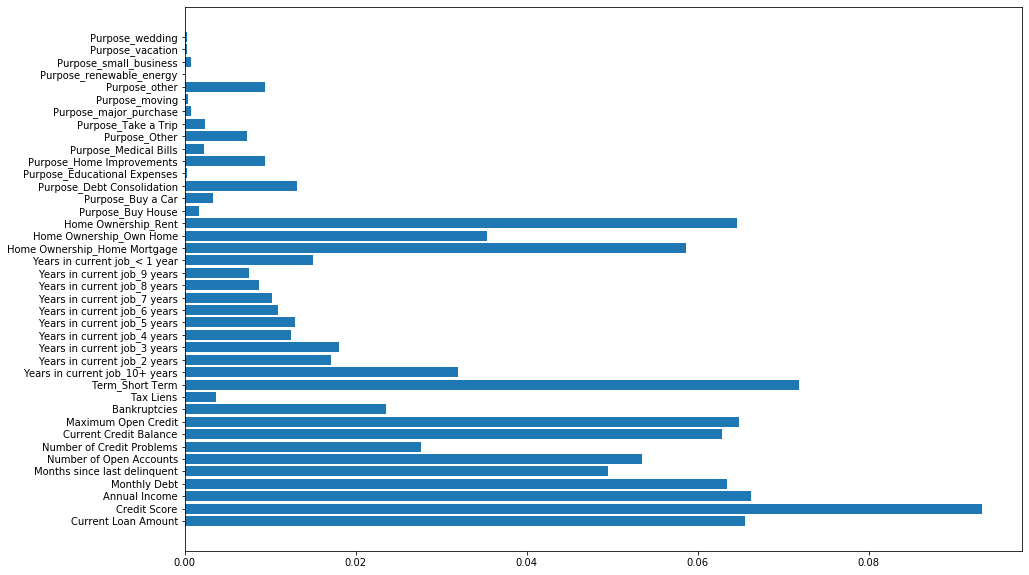

In [8]:
# Graphing
fig, ax = plt.subplots(figsize=(15, 10))
ax.barh(width=rf_clf.feature_importances_, y=X_train_new.columns)

In [99]:
# Selecting the top features at a cap of 0.05
top_important_features = np.where(rf_clf.feature_importances_ > 0.05)
print(top_important_features)
print(len(top_important_features[0]))  # Number of features that qualify

(array([ 0,  1,  2,  3,  5,  7,  8, 11, 22, 24]),)
10


In [100]:
# Extracting the top feature column names
top_important_feature_names = [columns for columns in X_train_new.columns[top_important_features]]
top_important_feature_names

['Current Loan Amount',
 'Credit Score',
 'Annual Income',
 'Monthly Debt',
 'Number of Open Accounts',
 'Current Credit Balance',
 'Maximum Open Credit',
 'Term_Short Term',
 'Home Ownership_Home Mortgage',
 'Home Ownership_Rent']

In [101]:
# Creating new training and testing data with top features
important_train_features = X_train_new[top_important_feature_names]
important_test_features = X_test[top_important_feature_names]

In [7]:
important_train_features.shape, important_test_features.shape, y_train_new.shape, y_test.shape

((88258, 10), (15504, 10), (88258,), (15504,))

In [114]:
important_train_features.head()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Number of Open Accounts,Current Credit Balance,Maximum Open Credit,Term_Short Term,Home Ownership_Home Mortgage,Home Ownership_Rent
0,44572.0,721.0,481270.0,5173.70,3.0,13623.0,26752.0,1,0,0
1,199958.0,74.0,973370.0,17240.60,6.0,88502.0,112970.0,1,0,0
2,516604.0,714.0,1357037.0,23748.29,14.0,393053.0,524942.0,1,0,0
3,532576.0,716.0,1154706.0,0.00,1.0,0.0,0.0,1,0,1
4,90024.0,749.0,633935.0,12837.16,11.0,66880.0,285736.0,1,0,1


In [115]:
important_test_features.head()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Number of Open Accounts,Current Credit Balance,Maximum Open Credit,Term_Short Term,Home Ownership_Home Mortgage,Home Ownership_Rent
74241,642598.0,74.0,1109942.0,9526.79,12.0,193781.0,1752938.0,1,1,0
41986,444048.0,724.0,1246362.0,13398.42,9.0,20197.0,95436.0,0,1,0
36143,467324.0,677.0,1424430.0,21603.95,23.0,267273.0,801768.0,0,0,1
62116,84656.0,732.0,835506.0,4783.25,7.0,10070.0,65824.0,1,1,0
57132,21868.0,665.0,1133502.0,15491.27,4.0,58501.0,69982.0,1,0,1


### Random Forest Model Evaluation: Feature Extraction

In [120]:
print("Train Score:", rf_clf.score(important_train_features, y_train_new))
print("Test Score:", rf_clf.score(important_test_features, y_test))
print("OOB Score:", rf_clf.oob_score_)

Train Score: 0.9504294228285255
Test Score: 0.6727296181630547
OOB Score: 0.7639080876521108


In [121]:
print('Confusion Matrix - Training Dataset')
print(pd.crosstab(y_train_new, rf_clf.predict(important_train_features), rownames=['True'], colnames=['Predicted'], margins=True))

Confusion Matrix - Training Dataset
Predicted      0      1    All
True                          
0          41246   2883  44129
1           1492  42637  44129
All        42738  45520  88258


### Confusion Matrix

In [122]:
confusion_matrix_metrics(TN=41246, FP=2883, FN=1492, TP=42637, P=44129, N=44129)

TNR: 0.9346688118924064
FPR: 0.06533118810759364
FNR: 0.03380996623535543
TPR: 0.9661900337646445
Precision: 0.9366652021089631
Recall: 0.9661900337646445
F1 Score: 0.9511985632857032


In [124]:
print('Confusion Matrix - Testing Dataset')
print(pd.crosstab(y_test, rf_clf.predict(important_test_features), rownames=['True'], colnames=['Predicted'], margins=True))

Confusion Matrix - Testing Dataset
Predicted     0      1    All
True                         
0          1360   3149   4509
1          1925   9070  10995
All        3285  12219  15504


In [126]:
confusion_matrix_metrics(TN=1360, FP=3149, FN=1925, TP=9070, P=10995, N=4509)

TNR: 0.3016189842537148
FPR: 0.6983810157462852
FNR: 0.17507958162801274
TPR: 0.8249204183719873
Precision: 0.7422866028316556
Recall: 0.8249204183719873
F1 Score: 0.7814250021538727


## Support Vector Machine
One of the assumptions with svm is that the data needs to be scaled

In [2]:
svm = SVC(random_state=19, C=1.0, kernel="rbf")

In [3]:
svm.fit(X_train_rescaled, y_train_new)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=19, shrinking=True, tol=0.001,
    verbose=False)

In [5]:
svm.score(X_train_rescaled, y_train_new)

0.7625257767001292

In [32]:
svm.score(X_test, y_test)

0.709171826625387

### Confusion Matrix: SVM

In [6]:
# Confusion Matrix
print('Confusion Matrix - Training Dataset')
print(pd.crosstab(y_train_new, svm.predict(X_train_rescaled), rownames=['True'], colnames=['Predicted'], margins=True))

Confusion Matrix - Training Dataset
Predicted      0      1    All
True                          
0          27356  16773  44129
1           4186  39943  44129
All        31542  56716  88258


In [8]:
confusion_matrix_metrics(TN=27356, FP=16773, FN=4186, TP=39943, P=44129, N=44129)

TNR: 0.619909809875592
FPR: 0.380090190124408
FNR: 0.09485825647533368
TPR: 0.9051417435246664
Precision: 0.704263347203611
Recall: 0.9051417435246664
F1 Score: 0.7921661956467847


In [16]:
print('Confusion Matrix - Testing Dataset')
print(pd.crosstab(y_test, svm.predict(X_test), rownames=['True'], colnames=['Predicted'], margins=True))

Confusion Matrix - Testing Dataset
Predicted      1    All
True                   
0           4509   4509
1          10995  10995
All        15504  15504


### AUC ROC

In [34]:
roc_auc_score(y_train_new, svm.predict(X_train_rescaled))

0.7625257767001291

In [35]:
roc_auc_score(y_test, svm.predict(X_test))

0.5

## K-Nearest Neighbors

In [36]:
# Instantiating KNN
knn_clf = KNeighborsClassifier()

In [37]:
# Grid Search
param_knn = {"n_neighbors": [5, 7, 9, 11]}
grid_knn = GridSearchCV(knn_clf, param_grid=param_knn)

In [38]:
# Fitting model
grid_knn.fit(X_train_rescaled, y_train_new)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [5, 7, 9, 11]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring=None, verbose=0)

In [39]:
grid_knn.best_params_

{'n_neighbors': 11}

In [41]:
grid_knn.cv_results_

{'mean_fit_time': array([2.01058431, 2.05288095, 2.00450478, 2.02775569]),
 'std_fit_time': array([0.17879994, 0.19099507, 0.18572043, 0.1939131 ]),
 'mean_score_time': array([28.09950471, 31.72052593, 32.59000802, 35.59207487]),
 'std_score_time': array([1.62672953, 1.43080425, 1.56008538, 2.98341278]),
 'param_n_neighbors': masked_array(data=[5, 7, 9, 11],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 5},
  {'n_neighbors': 7},
  {'n_neighbors': 9},
  {'n_neighbors': 11}],
 'split0_test_score': array([0.53076139, 0.52900521, 0.524983  , 0.52215046]),
 'split1_test_score': array([0.52804215, 0.52900521, 0.52747564, 0.52554951]),
 'split2_test_score': array([0.83916837, 0.85287786, 0.86103558, 0.86777702]),
 'split3_test_score': array([0.84935698, 0.86063113, 0.86912923, 0.8792703 ]),
 'split4_test_score': array([0.84748739, 0.8560988 , 0.86488018, 0.87145204]),
 'mean_test_score': array([0.71896325, 0.72

In [42]:
grid_knn.score(X_train_rescaled, y_train_new)

0.7889823018876476

In [43]:
grid_knn.score(X_test, y_test)

0.709171826625387

### Elbow Chart

Minimum error:- 0.29082817337461303 at K = 0


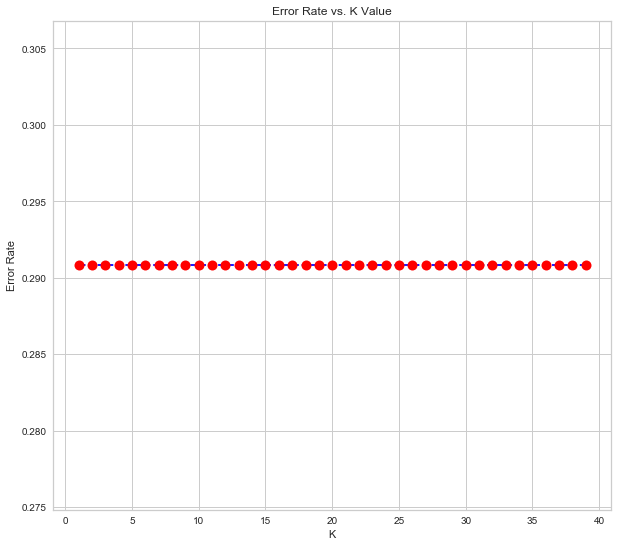

In [59]:
error_rate = []

pred_y = grid_knn.predict(X_test)
for i in range(1,40):
    error_rate.append(np.mean(pred_y != y_test))

plt.figure(figsize=(10,9))
plt.plot(range(1,40), error_rate,color='blue', linestyle='dashed', 
         marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-", min(error_rate),"at K =", error_rate.index(min(error_rate)))

### Confustion Matrix

In [60]:
# Confusion Matrix
print('Confusion Matrix - Training Dataset')
print(pd.crosstab(y_train_new, grid_knn.predict(X_train_rescaled), rownames=['True'], colnames=['Predicted'], margins=True))

Confusion Matrix - Training Dataset
Predicted      0      1    All
True                          
0          30349  13780  44129
1           4844  39285  44129
All        35193  53065  88258


In [61]:
confusion_matrix_metrics(TN=30349, FP=13780, FN=4844, TP=39285, P=44129, N=44129)

TNR: 0.6877336898638083
FPR: 0.3122663101361916
FNR: 0.10976908608851323
TPR: 0.8902309139114868
Precision: 0.7403184773391124
Recall: 0.8902309139114868
F1 Score: 0.8083832335329342


In [62]:
# Confusion Matrix
print('Confusion Matrix - Testing Dataset')
print(pd.crosstab(y_test, grid_knn.predict(X_test), rownames=['True'], colnames=['Predicted'], margins=True))

Confusion Matrix - Testing Dataset
Predicted      1    All
True                   
0           4509   4509
1          10995  10995
All        15504  15504


## KNN with PCA

In [63]:
grid_knn.fit(X_train_pca, y_train_new)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [5, 7, 9, 11]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring=None, verbose=0)

In [64]:
grid_knn.best_params_

{'n_neighbors': 11}

In [65]:
grid_knn.cv_results_

{'mean_fit_time': array([0.14952688, 0.13871632, 0.13538361, 0.19265618]),
 'std_fit_time': array([0.01537119, 0.00655974, 0.00164374, 0.047169  ]),
 'mean_score_time': array([1.94629464, 2.20311556, 2.38360543, 3.31726093]),
 'std_score_time': array([0.1364856 , 0.16329157, 0.17535226, 0.58366196]),
 'param_n_neighbors': masked_array(data=[5, 7, 9, 11],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 5},
  {'n_neighbors': 7},
  {'n_neighbors': 9},
  {'n_neighbors': 11}],
 'split0_test_score': array([0.52753229, 0.52435985, 0.52067754, 0.52260367]),
 'split1_test_score': array([0.52526626, 0.52605937, 0.52390664, 0.52396329]),
 'split2_test_score': array([0.83860186, 0.84993202, 0.86029912, 0.86602085]),
 'split3_test_score': array([0.8461277 , 0.85966801, 0.86759957, 0.8758144 ]),
 'split4_test_score': array([0.8453912 , 0.85417257, 0.86159424, 0.86912923]),
 'mean_test_score': array([0.71658386, 0.722838

In [67]:
grid_knn.score(X_train_pca, y_train_new)

0.7860703845543747

### Confusion Matrix

In [71]:
# Confusion Matrix
print('Confusion Matrix - Training Dataset')
print(pd.crosstab(y_train_new, grid_knn.predict(X_train_pca), rownames=['True'], colnames=['Predicted'], margins=True))

Confusion Matrix - Training Dataset
Predicted      0      1    All
True                          
0          30147  13982  44129
1           4899  39230  44129
All        35046  53212  88258


In [72]:
confusion_matrix_metrics(TN=30147, FP=13982, FN=4899, TP=39230, P=44129, N=44129)

TNR: 0.6831562011375739
FPR: 0.3168437988624261
FNR: 0.11101543202882458
TPR: 0.8889845679711754
Precision: 0.7372397203638277
Recall: 0.8889845679711754
F1 Score: 0.8060324015574116


In [95]:
# Confusion Matrix
print('Confusion Matrix - Testing Dataset')
print(pd.crosstab(y_test, grid_knn.predict(X_test.drop(columns=['Purpose_Buy a Car', 'Purpose_Debt Consolidation', 'Purpose_Educational Expenses', 'Purpose_Home Improvements', 'Purpose_Medical Bills', 'Purpose_Other', 'Purpose_Take a Trip', 'Purpose_major_purchase', 'Purpose_moving', 'Purpose_other', 'Purpose_renewable_energy', 'Purpose_small_business', 'Purpose_vacation', 'Purpose_wedding'])), rownames=['True'], colnames=['Predicted'], margins=True))

Confusion Matrix - Testing Dataset
Predicted     0     1    All
True                        
0          2446  2063   4509
1          6221  4774  10995
All        8667  6837  15504


In [96]:
confusion_matrix_metrics(TN=2446, FP=2063, FN=6221, TP=4774, P=10995, N=4509)

TNR: 0.5424706143269018
FPR: 0.45752938567309825
FNR: 0.5658026375625285
TPR: 0.4341973624374716
Precision: 0.6982594705280094
Recall: 0.4341973624374716
F1 Score: 0.5354419021982952


# Boosting

### Gradient Boosting

In [3]:
gb_clf = GradientBoostingClassifier()

In [4]:
# Grid Search
param_gb = {"n_estimators":[100, 300, 500], "max_depth":[3, 5]}
grid_gb = GridSearchCV(gb_clf, param_grid=param_gb)

In [5]:
grid_gb.fit(X_train_new, y_train_new)

GridSearchCV(cv=None, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
      

In [6]:
grid_gb.best_params_

{'max_depth': 5, 'n_estimators': 500}

In [7]:
grid_gb.cv_results_

{'mean_fit_time': array([ 15.48914456,  48.84513602,  77.48324642,  28.60990953,
         94.86413631, 150.24117289]),
 'std_fit_time': array([0.35630827, 1.49228696, 4.51370533, 2.5523888 , 9.84424728,
        5.75484751]),
 'mean_score_time': array([0.02266302, 0.05571985, 0.08994718, 0.04300313, 0.09537482,
        0.1424664 ]),
 'std_score_time': array([0.00112387, 0.00233387, 0.01770104, 0.0074452 , 0.01120147,
        0.00711489]),
 'param_max_depth': masked_array(data=[3, 3, 3, 5, 5, 5],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[100, 300, 500, 100, 300, 500],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 3, 'n_estimators': 100},
  {'max_depth': 3, 'n_estimators': 300},
  {'max_depth': 3, 'n_estimators': 500},
  {'max_depth': 5, 'n_estimators': 100},
  {'max_depth': 5, 'n_e

In [20]:
print(grid_gb.score(X_train_new, y_train_new))
print(grid_gb.score(X_test, y_test))

0.827811643137166
0.7020768833849329


### Confusion Matrix

In [14]:
# Confusion Matrix
print('Confusion Matrix - Training Dataset')
print(pd.crosstab(y_train_new, grid_gb.predict(X_train_new), rownames=['True'], colnames=['Predicted'], margins=True))

Confusion Matrix - Training Dataset
Predicted      0      1    All
True                          
0          31041  13088  44129
1           2109  42020  44129
All        33150  55108  88258


In [16]:
confusion_matrix_metrics(TN=31041, FP=13088, FN=2109, TP=42020, P=44129, N=44129)

TNR: 0.7034149878764532
FPR: 0.2965850121235469
FNR: 0.04779170160212105
TPR: 0.9522082983978789
Precision: 0.7625027219278507
Recall: 0.9522082983978789
F1 Score: 0.846861553654383


In [17]:
# Confusion Matrix
print('Confusion Matrix - Testing Dataset')
print(pd.crosstab(y_test, grid_gb.predict(X_test), rownames=['True'], colnames=['Predicted'], margins=True))

Confusion Matrix - Testing Dataset
Predicted     0      1    All
True                         
0           719   3790   4509
1           829  10166  10995
All        1548  13956  15504


In [18]:
confusion_matrix_metrics(TN=719, FP=3790, FN=829, TP=10166, P=10995, N=4509)

TNR: 0.15945886005766247
FPR: 0.8405411399423376
FNR: 0.07539790814006367
TPR: 0.9246020918599364
Precision: 0.7284322155345371
Recall: 0.9246020918599364
F1 Score: 0.8148771592320949


## Feature Importance/Selection

In [10]:
gb_clf = GradientBoostingClassifier(n_estimators=500, max_depth=5)

In [11]:
gb_clf.fit(X_train_new, y_train_new)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [13]:
print(gb_clf.score(X_train_new, y_train_new))
print(gb_clf.score(X_test, y_test))

0.827811643137166
0.701625386996904


<BarContainer object of 40 artists>

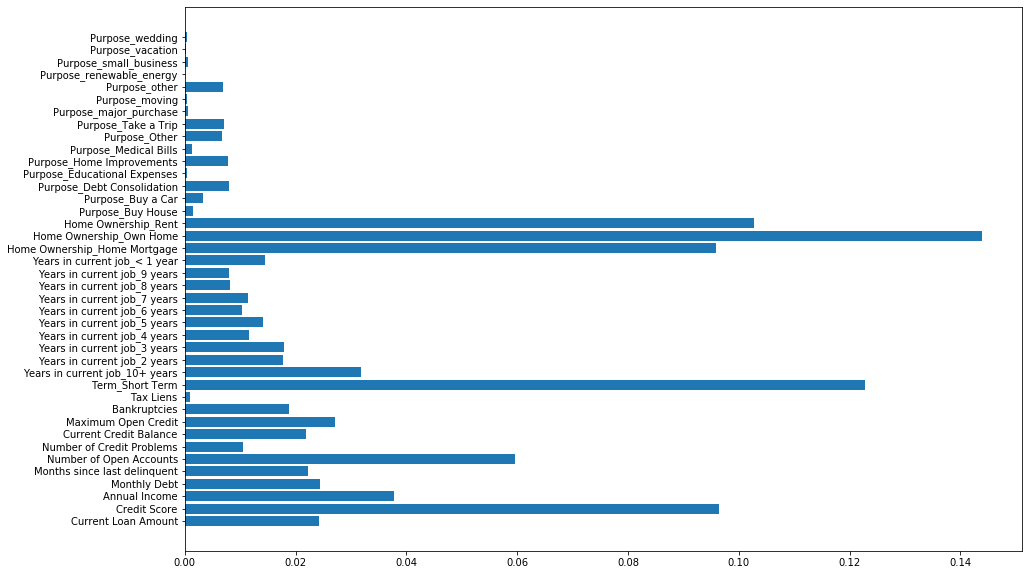

In [21]:
# Graphing
fig, ax = plt.subplots(figsize=(15, 10))
ax.barh(width=gb_clf.feature_importances_, y=X_train_new.columns)

### Conclusion

Gradient Boost is a little more accurate than Random Forest

In [58]:
# Selecting the top features at a cap of 0.08
gb_important_features = np.where(gb_clf.feature_importances_ > 0.08)
print(gb_important_features)
print(len(gb_important_features[0]))  # Number of features that qualify

(array([ 1, 11, 22, 23, 24]),)
5


In [59]:
# Extracting the top feature column names
gb_important_feature_names = [columns for columns in X_train_new.columns[gb_important_features]]
gb_important_feature_names

['Credit Score',
 'Term_Short Term',
 'Home Ownership_Home Mortgage',
 'Home Ownership_Own Home',
 'Home Ownership_Rent']

In [60]:
# Creating new training and testing data with top features
gb_important_train_features = X_train_new[gb_important_feature_names]
gb_important_test_features = X_test[gb_important_feature_names]

In [61]:
gb_important_train_features.shape, gb_important_test_features.shape

((88258, 5), (15504, 5))

## Gradient Boost on Important Features

In [62]:
param_gb = {"n_estimators":[100, 500, 700], "max_depth":[3, 7, 9]}

# Grid search
grid_gb = GridSearchCV(gb_clf, param_grid=param_gb)

In [63]:
grid_gb.fit(gb_important_train_features, y_train_new)

GridSearchCV(cv=None, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=5,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=500,
                                                  n_iter_no_change=None,
      

In [64]:
grid_gb.best_params_

{'max_depth': 7, 'n_estimators': 700}

In [65]:
grid_gb.cv_results_

{'mean_fit_time': array([ 2.79419231, 14.03580494, 16.99694395,  5.17686009, 25.99817982,
        36.23811131,  6.44363856, 32.32303977, 45.26004543]),
 'std_fit_time': array([0.20602614, 1.87667975, 1.36823981, 0.15199638, 0.84668464,
        1.08776247, 0.20733486, 1.31298492, 2.31705827]),
 'mean_score_time': array([0.02551408, 0.08151135, 0.10451641, 0.04419355, 0.15742588,
        0.20292268, 0.05652127, 0.18571458, 0.25146742]),
 'std_score_time': array([0.00218617, 0.00858819, 0.00208383, 0.00350885, 0.01485702,
        0.00760824, 0.00394456, 0.00525281, 0.00425683]),
 'param_max_depth': masked_array(data=[3, 3, 3, 7, 7, 7, 9, 9, 9],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[100, 500, 700, 100, 500, 700, 100, 500, 700],
              mask=[False, False, False, False, False, False, False, False,
                    False],
  

In [66]:
print(grid_gb.score(gb_important_train_features, y_train_new))
print(grid_gb.score(gb_important_test_features, y_test))

0.7778784926012373
0.6942079463364293


### Conclusion

No signs of over or under-fitting. Will increase the number of trees in the next grid search

### Confusion Matrix

In [67]:
# Confusion Matrix
print('Confusion Matrix - Training Dataset')
print(pd.crosstab(y_train_new, grid_gb.predict(gb_important_train_features), rownames=['True'], colnames=['Predicted'], margins=True))

Confusion Matrix - Training Dataset
Predicted      0      1    All
True                          
0          27365  16764  44129
1           2840  41289  44129
All        30205  58053  88258


In [68]:
confusion_matrix_metrics(TN=27365, FP=16764, FN=2840, TP=41289, P=44129, N=44129)

TNR: 0.6201137573930975
FPR: 0.3798862426069025
FNR: 0.06435677219062294
TPR: 0.935643227809377
Precision: 0.7112293938297762
Recall: 0.935643227809377
F1 Score: 0.808146248850091


In [69]:
# Confusion Matrix
print('Confusion Matrix - Testing Dataset')
print(pd.crosstab(y_test, grid_gb.predict(gb_important_test_features), rownames=['True'], colnames=['Predicted'], margins=True))

Confusion Matrix - Testing Dataset
Predicted     0      1    All
True                         
0           593   3916   4509
1           825  10170  10995
All        1418  14086  15504


In [70]:
confusion_matrix_metrics(TN=593, FP=3916, FN=825, TP=10170, P=10995, N=4509)

TNR: 0.13151474828121534
FPR: 0.8684852517187847
FNR: 0.07503410641200546
TPR: 0.9249658935879945
Precision: 0.7219934686923186
Recall: 0.9249658935879945
F1 Score: 0.8109724492643834


## New Gradient Boosting GridSearch

In [71]:
param_gb = {"n_estimators":[700, 900, 1100], "max_depth":[7]}
grid_gb = GridSearchCV(gb_clf, param_grid=param_gb)

In [72]:
grid_gb.fit(gb_important_train_features, y_train_new)

GridSearchCV(cv=None, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=5,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=500,
                                                  n_iter_no_change=None,
      

In [73]:
grid_gb.best_params_

{'max_depth': 7, 'n_estimators': 900}

In [74]:
grid_gb.cv_results_

{'mean_fit_time': array([31.75898452, 40.23909087, 49.40661039]),
 'std_fit_time': array([1.64242276, 1.26650038, 1.31502636]),
 'mean_score_time': array([0.19673767, 0.24962316, 0.30443869]),
 'std_score_time': array([0.00205531, 0.00326642, 0.00420616]),
 'param_max_depth': masked_array(data=[7, 7, 7],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[700, 900, 1100],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 7, 'n_estimators': 700},
  {'max_depth': 7, 'n_estimators': 900},
  {'max_depth': 7, 'n_estimators': 1100}],
 'split0_test_score': array([0.52113075, 0.5210741 , 0.52073419]),
 'split1_test_score': array([0.52215046, 0.52158396, 0.52164061]),
 'split2_test_score': array([0.91094494, 0.91128484, 0.91117154]),
 'split3_test_score': array([0.92011784, 0.92074103, 0.92074103]),
 'split4_test_score': array([0.92198742, 0.9

In [75]:
print(grid_gb.score(gb_important_train_features, y_train_new))
print(grid_gb.score(gb_important_test_features, y_test))

0.7779351446894333
0.694078947368421


In [76]:
# Confusion Matrix
print('Confusion Matrix - Training Dataset')
print(pd.crosstab(y_train_new, grid_gb.predict(gb_important_train_features), rownames=['True'], colnames=['Predicted'], margins=True))

Confusion Matrix - Training Dataset
Predicted      0      1    All
True                          
0          27362  16767  44129
1           2832  41297  44129
All        30194  58064  88258


In [80]:
confusion_matrix_metrics(TN=27362, FP=16767, FN=2832, TP=41297, P=44129, N=44129)

TNR: 0.6200457748872623
FPR: 0.37995422511273763
FNR: 0.06417548550839584
TPR: 0.9358245144916042
Precision: 0.7112324331771838
Recall: 0.9358245144916042
F1 Score: 0.8082158269157379


In [79]:
# Confusion Matrix
print('Confusion Matrix - Testing Dataset')
print(pd.crosstab(y_test, grid_gb.predict(gb_important_test_features), rownames=['True'], colnames=['Predicted'], margins=True))

Confusion Matrix - Testing Dataset
Predicted     0      1    All
True                         
0           589   3920   4509
1           823  10172  10995
All        1412  14092  15504


In [ ]:
confusion_matrix_metrics(TN=)

### AUC ROC Score

In [78]:
roc_auc_score(y_test, grid_gb.predict(gb_important_test_features))

0.5278877140368347